# LAB-12

## Q.1 Support Vector Machine:

Data and other details are available at

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset?
Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits?
For both datasets, provide a step-by-step code, including:  

Loading the dataset
Visualizing the data
Splitting the data into training and testing sets
Initializing and training the SVM model
Testing the model

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# pip install scikit-learn

In [61]:
# Loading the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length and width)
y = iris.target

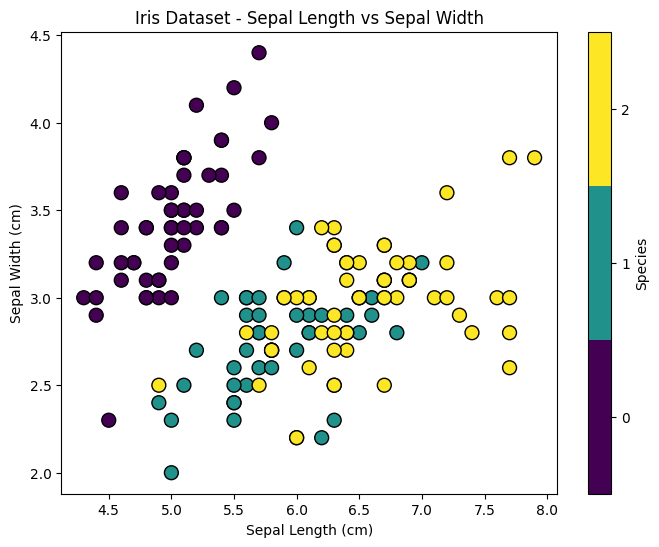

In [62]:
# Visualizing the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.colorbar(ticks=[0, 1, 2], label='Species', orientation='vertical', boundaries=[-0.5, 0.5, 1.5, 2.5])
plt.show()


In [63]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [64]:

# SVM model
def train_svm(X_train, y_train):
    svm = SVC(kernel='linear', C=1.0)  # Using a linear SVM classifier
    svm.fit(X_train, y_train)
    return svm

svm_model = train_svm(X_train, y_train)

In [65]:
y_pred = svm_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



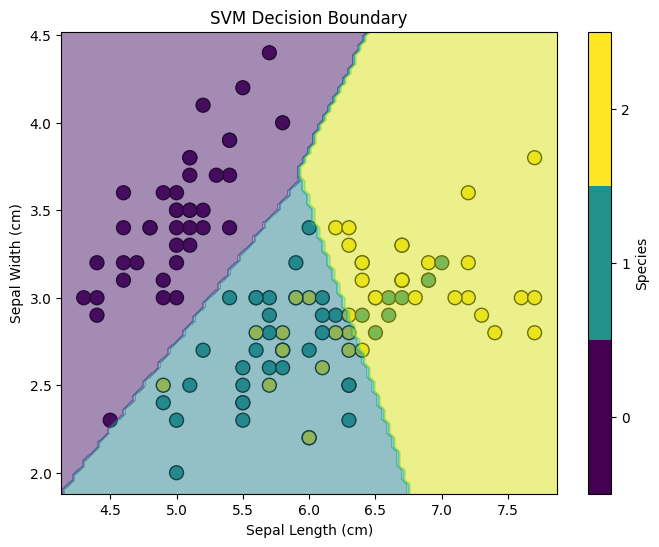

In [67]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    # Plot decision boundary
    ax.contourf(XX, YY, Z, cmap='viridis', alpha=0.5)

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary')
    plt.colorbar(ticks=[0, 1, 2], label='Species', orientation='vertical', boundaries=[-0.5, 0.5, 1.5, 2.5])
    plt.show()

# Plot decision boundary for the trained SVM model
plot_decision_boundary(svm_model, X_train, y_train)


## Loading the digit dataset

In [68]:
# Load dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target


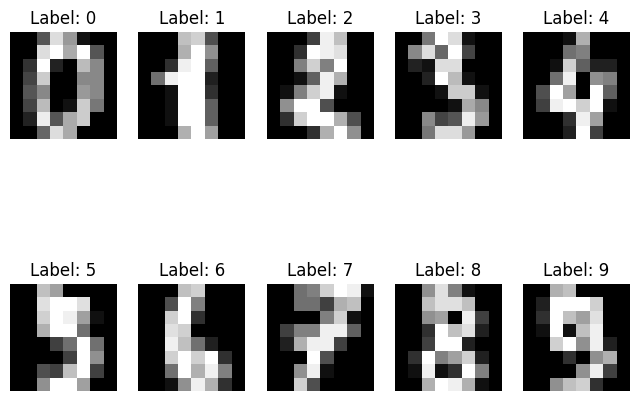

In [69]:
# Visualizing the data
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.show()


In [70]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [71]:
# SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Classify the data
y_pred = svm_model.predict(X_test)

In [72]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Q. 2 Principal Component Analysis:

1. To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py.

2. DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition).

3. Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison).
Are you getting the same result?

In [73]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [74]:
# Standardize the data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [75]:
# Covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print(cov_matrix.shape)

# eigenvalues and eigenvectors of the cov_matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

(4, 4)


In [76]:
# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]


In [77]:
# Select the top k eigenvectors based on explained variance ratio
explained_variance_ratio = eigen_values / np.sum(eigen_values)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
k = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

In [78]:
# Keep the top k eigenvectors
k = 3
top_k_eigen_vectors = eigen_vectors[:, :k]

# Transform the original data into the new subspace
X_pca = X_std.dot(top_k_eigen_vectors)

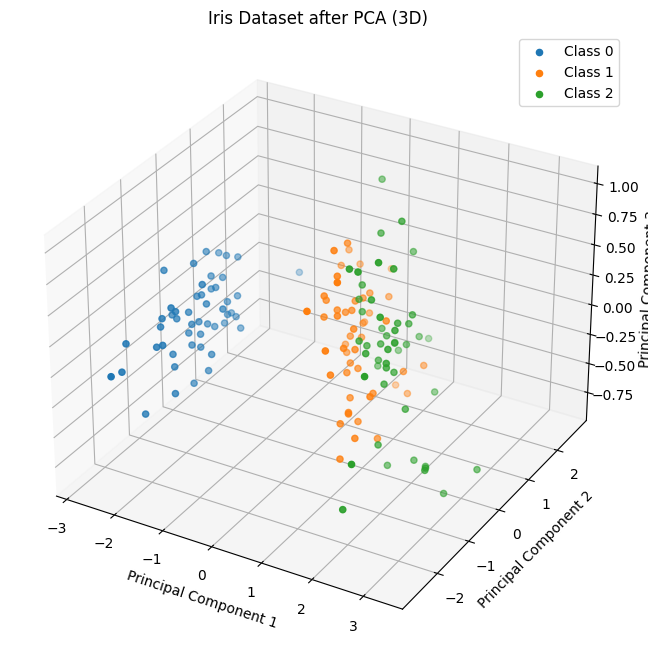

In [79]:
# Visualize the data in the new subspace with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
for label in np.unique(iris.target):
    ax.scatter(X_pca[iris.target == label, 0], X_pca[iris.target == label, 1], X_pca[iris.target == label, 2],
               label=f'Class {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Iris Dataset after PCA (3D)')
ax.legend()

plt.show()

# Compare the plots

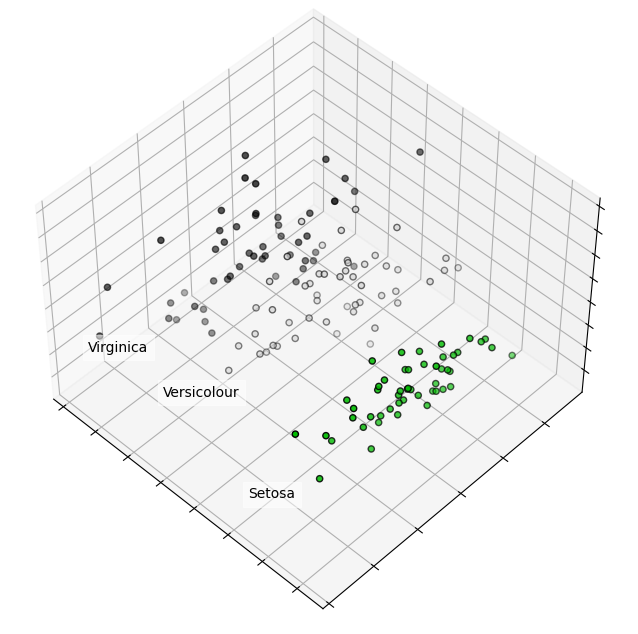

In [80]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

## Comparing the results of the provided code with the previously provided code:

Both codes perform PCA on the Iris dataset and reduce the dimensionality to 3 components.
They both visualize the transformed data using a 3D scatter plot.

The differences lie in the specific techniques used for visualization:

1. The provided code directly uses scikit-learn's PCA implementation and then plots the 3D scatter plot with text annotations for class labels.

2. The previously provided code manually implements PCA using NumPy and then plots the 3D scatter plot with class labels distinguished by color.

While both codes achieve similar visualization goals, they use different approaches for PCA computation and scatter plot generation. The results may vary slightly due to differences in the internal implementations and random seed handling.